Objective of the assignment: To built a predictive model that can predict customer churn for a given company(Banking Marketing Company in this case). Techniques used to build the model: Machine Learning including feature selection, model evaluation, and performance metrics.

**Importing all the required libraries and utilities**



In [ ]:
import pandas as pd #Data Manipulation
import numpy as np
import matplotlib.pyplot as plt# data visualisation
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

**Loading the dataset**

In [ ]:
#mounting google collab with google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/bank.csv') #importing pandas dataframe from Bank Data csv file
df.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df.rename(columns={'y':'Deposit'}, inplace=True)#setting the y-axis as deposit
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Collecting data information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB




The data set contains the above attributes with the following information:

1. age: (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")



Target variable: y: is the client subscribed to a term deposit?(binary:"yes","no"). this target variable has to be predicted.

From above, it is considered that: there are 11162 rows of info and 17 columns. the label columns that tells us if the customer churned or not is the deposit column (yes=not churned, no=churned)


In [ ]:
df.shape

(11162, 17)

**Checking the presence of missing values**

In [ ]:
df.isnull().values.any()

False

Here there are no missing values in the dataset. But we could see few features like 'unknown' and 'others' for few columns. This may be the missing values or outliers. This data will not be much helpful.

In [ ]:
#deleting the rows from column 'poutcome' containing 'other'
other=df.poutcome=='other'
df1=df.drop(df[other].index, axis=0, inplace=False)
# filling 'unknown' in job and education to 'other'
df1[['job','education']] = df1[['job','education']].replace(['unknown'],'other')
df1.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


5 point summary of numerical attributes and checking the presence of outliers

In [ ]:
df1.info(), df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10625 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10625 non-null  int64 
 1   job        10625 non-null  object
 2   marital    10625 non-null  object
 3   education  10625 non-null  object
 4   default    10625 non-null  object
 5   balance    10625 non-null  int64 
 6   housing    10625 non-null  object
 7   loan       10625 non-null  object
 8   contact    10625 non-null  object
 9   day        10625 non-null  int64 
 10  month      10625 non-null  object
 11  duration   10625 non-null  int64 
 12  campaign   10625 non-null  int64 
 13  pdays      10625 non-null  int64 
 14  previous   10625 non-null  int64 
 15  poutcome   10625 non-null  object
 16  deposit    10625 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


(None,
                 age       balance           day      duration      campaign  \
 count  10625.000000  10625.000000  10625.000000  10625.000000  10625.000000   
 mean      41.282071   1507.858165     15.672282    372.679153      2.522918   
 std       11.886225   3117.423878      8.413455    349.110673      2.764894   
 min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
 25%       32.000000    119.000000      8.000000    138.000000      1.000000   
 50%       39.000000    543.000000     15.000000    254.000000      2.000000   
 75%       49.000000   1694.000000     22.000000    499.000000      3.000000   
 max       95.000000  81204.000000     31.000000   3881.000000     63.000000   
 
               pdays      previous  
 count  10625.000000  10625.000000  
 mean      42.983341      0.664282  
 std      100.800228      1.858347  
 min       -1.000000      0.000000  
 25%       -1.000000      0.000000  
 50%       -1.000000      0.000000  
 75%       -

We can see from the above 5 point summary that the variable balance consists of more outliers. These outliers need to be dropped out. For this zscore could be used.

In [ ]:
df1[['balance']].mean()
df1['balanced_outliers']=df1['balance']
df1['balanced_outliers']=zscore(df1['balanced_outliers'])

condition1=(df1['balanced_outliers']>3) | (df1['balanced_outliers']<-3)
df2=df1.drop(df1[condition1].index, axis=0, inplace=False)
new_df=df2.drop('balanced_outliers', axis=1)
new_df.info(), new_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10447 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10447 non-null  int64 
 1   job        10447 non-null  object
 2   marital    10447 non-null  object
 3   education  10447 non-null  object
 4   default    10447 non-null  object
 5   balance    10447 non-null  int64 
 6   housing    10447 non-null  object
 7   loan       10447 non-null  object
 8   contact    10447 non-null  object
 9   day        10447 non-null  int64 
 10  month      10447 non-null  object
 11  duration   10447 non-null  int64 
 12  campaign   10447 non-null  int64 
 13  pdays      10447 non-null  int64 
 14  previous   10447 non-null  int64 
 15  poutcome   10447 non-null  object
 16  deposit    10447 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


(None,
                 age       balance           day      duration      campaign  \
 count  10447.000000  10447.000000  10447.000000  10447.000000  10447.000000   
 mean      41.239303   1223.334546     15.653872    372.542644      2.521011   
 std       11.869253   1802.797849      8.420731    349.483757      2.761070   
 min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
 25%       32.000000    113.000000      8.000000    137.000000      1.000000   
 50%       39.000000    522.000000     15.000000    253.000000      2.000000   
 75%       49.000000   1600.000000     22.000000    499.000000      3.000000   
 max       95.000000  10787.000000     31.000000   3881.000000     63.000000   
 
               pdays      previous  
 count  10447.000000  10447.000000  
 mean      42.936154      0.663348  
 std      100.944959      1.862983  
 min       -1.000000      0.000000  
 25%       -1.000000      0.000000  
 50%       -1.000000      0.000000  
 75%       -



**Exploratory Data Analysis**

We are going to explore the distribution of the numerical data of the following columns:

Univariate Analysis

Analysis of 'deposit' variable


In [ ]:
#frequency of 'deposit'
new_df['deposit'].value_counts()

no     5568
yes    4879
Name: deposit, dtype: int64



Here,

0 = No

1 = Yes


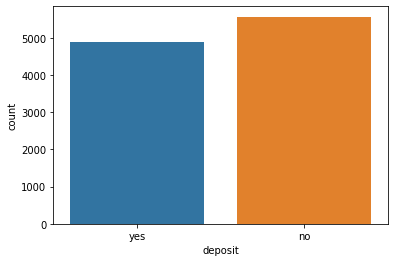

In [ ]:
#plotting the 'deposit' frequency
sns.countplot(data=new_df, x='deposit')


In [ ]:
#Normalizing the frequency table of 'deposit' variable
new_df['deposit'].value_counts(normalize=True)

no     0.532976
yes    0.467024
Name: deposit, dtype: float64

From above analysis we can see that 46.7% people **have** term deposit while the remaining 53.2% have **no** term deposit.

Performing the feature selection to select the relevant features that will be used in the model

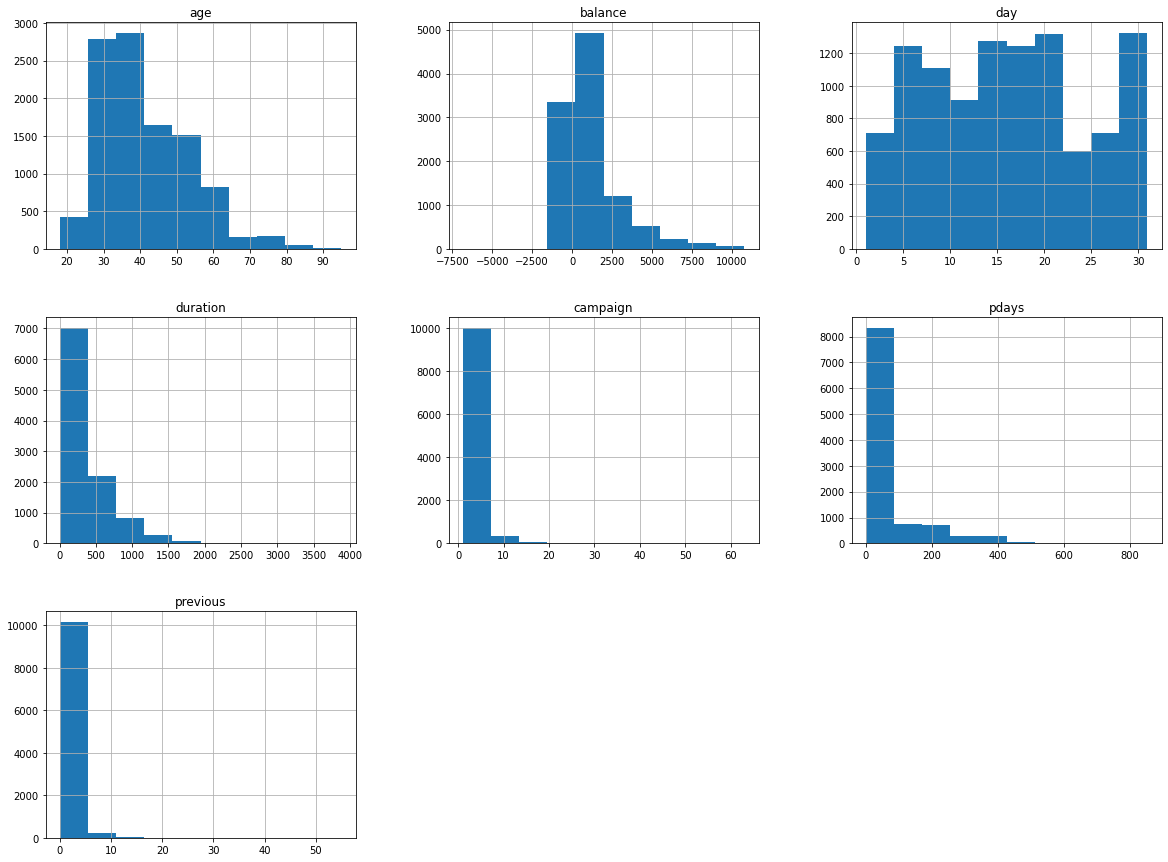

In [ ]:
new_df.hist(figsize=(20,15))
plt.show()


Analysing the relationship between other variables and the target variable which is deposit

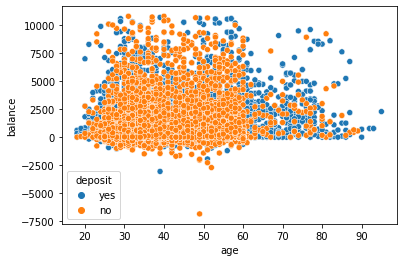

In [ ]:
#using seaborn
sns.scatterplot(x='age', y='balance', hue='deposit', data=new_df)

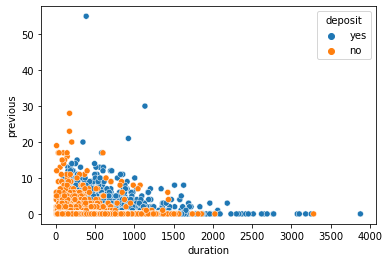

In [ ]:
sns.scatterplot(x='duration',y='previous',hue='deposit',data=new_df)

Text(0.5, 0, 'deposit: target variable')

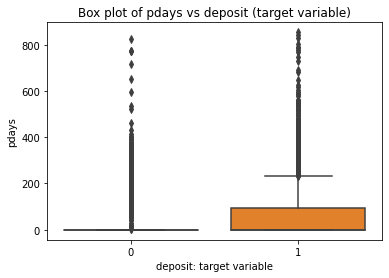

In [ ]:
#pdays
sns.boxplot(y=new_df['pdays'], x=new_df['deposit'])
plt.title('Box plot of pdays vs deposit (target variable)')
plt.xlabel('deposit: target variable')

Text(0.5, 1.0, 'PDF of pdays for target variable deposit')

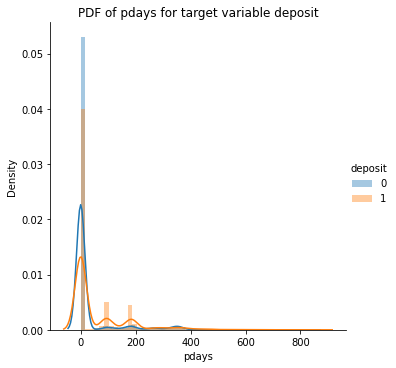

In [ ]:
sns.FacetGrid(new_df, hue='deposit', size=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable deposit')


In [ ]:
new_df.pdays.describe()


count    10447.000000
mean        42.936154
std        100.944959
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        854.000000
Name: pdays, dtype: float64

In [ ]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, new_df.pdays.quantile(x/100)))
iqr = new_df.pdays.quantile(0.75) - new_df.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than equal to 292.6999999999989
96% of pdays are less than equal to 328.0
97% of pdays are less than equal to 347.0
98% of pdays are less than equal to 364.0
99% of pdays are less than equal to 403.53999999999905
100% of pdays are less than equal to 854.0
IQR 0.0




Observation:

1. The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
2. 75% clients contacted through campaign are not previously contacted.
3. Mean of pdays is 42.93
4. There are outliers as we can see from boxplot.



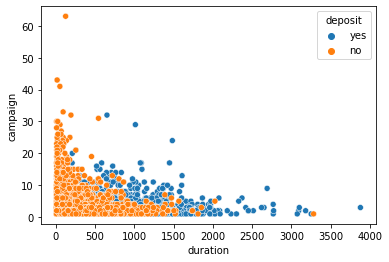

In [ ]:
sns.scatterplot(x='duration',y='campaign',hue='deposit',data=new_df)




Interpretation of the above graphs:

Age: The clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s. It has a normal distribution. Between 25 to 40 of age is more likely to subscribe the bank.

Balance: After dropping outliers in balance, the range of balance is still massive, from a minimum of -6847 to a maximum of 10443 euros, giving a range of 17290 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

Duration: It is left-skewed indicates that most calls are relatively short. Also, there is a large number of outliers.

Campaign: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

From the graph between campaign (number of calls made) vs duration, we can see that the clients have subscribed with less number of calls. With increase in number of calls, there is no much subscription. This should also be noted as more of number calls might result in losing the clients.


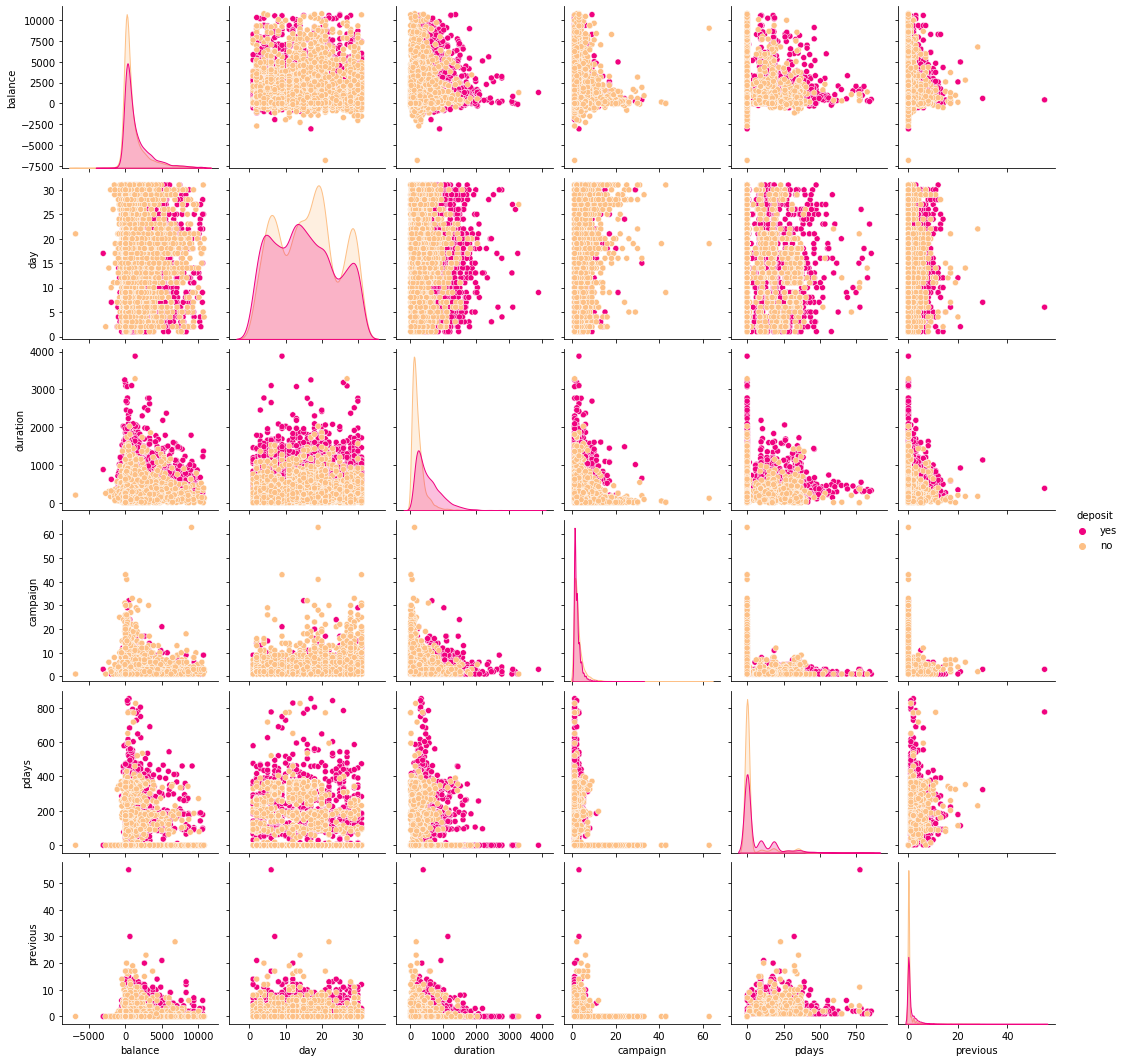

In [ ]:
sns.pairplot(new_df.iloc[:,1:], hue='deposit', palette='Accent_r')



Observation:

1. For most of the variables our pair plot is overlapping a lot.
2. Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.



In [ ]:
corr=new_df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.125466,-0.005273,-0.001765,-0.005236,0.017834,0.044404
balance,0.125466,1.000000,0.006841,0.033123,-0.026669,0.023581,0.041445
day,-0.005273,0.006841,1.000000,-0.019490,0.142474,-0.081826,-0.069702
duration,-0.001765,0.033123,-0.019490,1.000000,-0.041373,-0.029424,-0.022560
campaign,-0.005236,-0.026669,0.142474,-0.041373,1.000000,-0.106211,-0.064684
pdays,0.017834,0.023581,-0.081826,-0.029424,-0.106211,1.000000,0.542793
previous,0.044404,0.041445,-0.069702,-0.022560,-0.064684,0.542793,1.000000


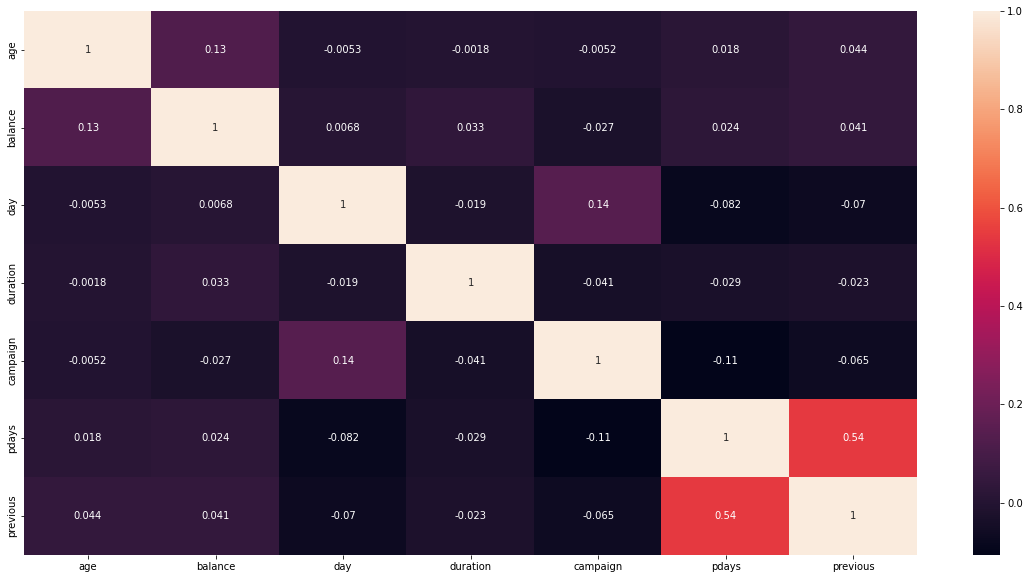

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)



From the pairplots, we can see that there is no clear relationship between the variables age, balance, duration and campaign.

From the heat map of correlation matrix, we can observe that “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”.

**Transforming the data for model building**


In [ ]:
new_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
#converting categorical values to numerical values
for feature in df.columns: # this will loop through all columns in the dataframe
    if new_df[feature].dtype=='object': #only apply for columns with categorical values
        new_df[feature]=pd.Categorical(new_df[feature]).codes
new_df.info(), new_df.describe()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10447 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        10447 non-null  int64
 1   job        10447 non-null  int8 
 2   marital    10447 non-null  int8 
 3   education  10447 non-null  int8 
 4   default    10447 non-null  int8 
 5   balance    10447 non-null  int64
 6   housing    10447 non-null  int8 
 7   loan       10447 non-null  int8 
 8   contact    10447 non-null  int8 
 9   day        10447 non-null  int64
 10  month      10447 non-null  int8 
 11  duration   10447 non-null  int64
 12  campaign   10447 non-null  int64
 13  pdays      10447 non-null  int64
 14  previous   10447 non-null  int64
 15  poutcome   10447 non-null  int8 
 16  deposit    10447 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 1013.0 KB


(None,
                 age           job      marital     education       default  \
 count  10447.000000  10447.000000  10447.00000  10447.000000  10447.000000   
 mean      41.239303      4.861013      1.19374      2.100890      0.015794   
 std       11.869253      3.621264      0.62526      0.793284      0.124684   
 min       18.000000      0.000000      0.00000      0.000000      0.000000   
 25%       32.000000      1.000000      1.00000      2.000000      0.000000   
 50%       39.000000      4.000000      1.00000      2.000000      0.000000   
 75%       49.000000      8.000000      2.00000      3.000000      0.000000   
 max       95.000000     11.000000      2.00000      3.000000      1.000000   
 
             balance       housing          loan       contact           day  \
 count  10447.000000  10447.000000  10447.000000  10447.000000  10447.000000   
 mean    1223.334546      0.474107      0.134201      0.511056     15.653872   
 std     1802.797849      0.499353      



**Splitting the data into training and test data:**

For splitting the data into training and test sets, we need to separate the Dependent and independent (Target) variables into two different data frames.

Since contact has no impact in the dataset, lets drop the column contact in our datasets.

Here our target variable is deposit. All other variables are dependant variables.


In [ ]:
from sklearn.model_selection import train_test_split # importing the sklearn package
from sklearn import metrics
from sklearn import preprocessing

x=new_df.drop(['contact','deposit'], axis=1)
y=new_df['deposit']

# splitting x and y into training and test data in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

**Scaling the data to improve the accuracy**

In [ ]:
# created another set of data with scaling function applied to it, to have an accuracy score
Bx = preprocessing.scale(x)
Bx_train, Bx_test, y_train, y_test = train_test_split(Bx, y, test_size=0.3, random_state=10)

training the models and comparing various models

**Logistic regression Model:**


In [ ]:
from sklearn.linear_model import LogisticRegression #importing the model
logmod1=LogisticRegression()
logmod1.fit(x_train,y_train) # feeding the training data to the model
y_predict=logmod1.predict(x_test) #predicting the test results


In [ ]:
#exploring the coefficients for each of the independent attributes
for idx, col_name in enumerate(x_train.columns):
    print('the coefficient for {} is {}'.format(col_name, logmod1.coef_[0][idx]))


the coefficient for age is -0.01276200091912946
the coefficient for job is 0.03280424570455872
the coefficient for marital is -0.02451625095567962
the coefficient for education is -0.02779620318747331
the coefficient for default is -0.004737998943544167
the coefficient for balance is 0.00012194098340775729
the coefficient for housing is -0.1650352681995879
the coefficient for loan is -0.046129147273460666
the coefficient for day is -0.011517067480450375
the coefficient for month is -0.07477588546740463
the coefficient for duration is 0.00431448114209645
the coefficient for campaign is -0.24683362521087324
the coefficient for pdays is 0.0015329619847639492
the coefficient for previous is 0.15842466661987634
the coefficient for poutcome is -0.09231808729021


In [ ]:
#checking the intercept for the model
intercept=logmod1.intercept_[0]
print('intercept for the model is {}'.format(intercept))


intercept for the model is -0.04047201266682943


In [ ]:
#calculating the model score and printing confusion matrix
logmod1_score=logmod1.score(x_test, y_test)
print('logistic regression model accuracy is {}'.format(logmod1_score))

logistic regression model accuracy is 0.7728867623604466


In [ ]:
print("confustion matrix for Logistic Regression is")
print(metrics.confusion_matrix(y_test, y_predict))

confustion matrix for Logistic Regression is
[[1333  308]
 [ 404 1090]]


From above confusion matrix results, true negative is 1333, true positive is 1090, false positive is 308, false negative is 404

In [ ]:
# Applying the Scaled training data to the logistic regression model
logmod2 = LogisticRegression()
logmod2.fit(Bx_train, y_train)

#Predicting the test results
y_predict1 = logmod2.predict(Bx_test)

#exploring the coefficients for each of the independent attributes

coef_df = pd.DataFrame(logmod2.coef_)
print(coef_df)


         0         1         2         3        4         5        6   \
0  0.063371  0.073212  0.167767  0.159684 -0.03987  0.173153 -0.61937   

         7         8         9         10       11        12        13  \
0 -0.224709 -0.052528 -0.016896  1.736045 -0.38942  0.316707  0.348858   

         14  
0  0.066518  


In [ ]:
#checking the intercept for the model

intercept1 = logmod2.intercept_[0]
print("The intercept for Logistic Regression model is {}".format(intercept1))


The intercept for Logistic Regression model is -0.04645860983944043


In [ ]:
# Calculating the model score

logmod2_score = logmod2.score(Bx_test, y_test)
print("The Logistic Regression model accuracy with scaled data is {}".format(logmod2_score))


The Logistic Regression model accuracy with scaled data is 0.7968102073365231


In [ ]:
# Printing confusion matrix

print("The confustion matrix for Logistic Regression with scaled data is")
print(metrics.confusion_matrix(y_test, y_predict1))

The confustion matrix for Logistic Regression with scaled data is
[[1358  283]
 [ 354 1140]]




Thus, it can be concluded that the logistic regression score is almost equal before and after scaling.

**Naive bayes Model:**


In [ ]:
from sklearn.naive_bayes import GaussianNB

naivemod1 = GaussianNB()
naivemod1.fit(x_train,y_train)
y_predict_naive = naivemod1.predict(x_test)
naivemod1_score = naivemod1.score(x_test, y_test)
print("The Naive Bayes model accuracy is {}".format(naivemod1_score))
print(metrics.confusion_matrix(y_test, y_predict_naive))


The Naive Bayes model accuracy is 0.7674641148325358
[[1328  313]
 [ 416 1078]]




The naive bayes model accuracy is 76.74%

True Postive is 1328 & True Negative is 1078.

False Postive is 313 & False negative is 416.


In [ ]:
 #applying Naive bayes to scaled data
naivemod2 = GaussianNB()
naivemod2.fit(Bx_train,y_train)
y_predict1_naive = naivemod2.predict(Bx_test)
naivemod2_score = naivemod2.score(Bx_test, y_test)
print("The Naive Bayes model accuracy is {}".format(naivemod2_score))
print(metrics.confusion_matrix(y_test, y_predict1_naive))


The Naive Bayes model accuracy is 0.7703349282296651
[[1323  318]
 [ 402 1092]]




The naive bayes model accuracy is 77.03%

True Postive is 1323 & True Negative is 1092.

False Postive is 318 & False negative is 402.

Naive Bayes Model accuracy is almost same before and after scaling.

**K-Nearest Neighbours Model:**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnmod1= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knnmod1.fit(x_train, y_train)
y_pred_knn = knnmod1.predict(x_test)
knnmod1_score = knnmod1.score(x_test, y_test)
print("The KNN model accuracy is {}".format(knnmod1_score))
print("The confusion matrix of KNN model is")
print(metrics.confusion_matrix(y_test,y_pred_knn))

The KNN model accuracy is 0.7403508771929824
The confusion matrix of KNN model is
[[1259  382]
 [ 432 1062]]




True Postive is 1259 & True Negative is 1062.

False Postive is 382 & False negative is 432.


In [ ]:
#for scaled data
knnmod2= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knnmod2.fit(Bx_train, y_train)
y_pred1_knn = knnmod2.predict(Bx_test)
knnmod2_score = knnmod2.score(Bx_test, y_test)
print("The KNN model accuracy with scaled data is {}".format(knnmod2_score))
print("The confusion matrix of KNN model is")
print(metrics.confusion_matrix(y_test,y_pred1_knn))

The KNN model accuracy with scaled data is 0.7696969696969697
The confusion matrix of KNN model is
[[1313  328]
 [ 394 1100]]




True Postive is 1313 & True Negative is 1100.

False Postive is 328 & False negative is 394.

K-Nearest Neighbours Model accuracy is almost same before and after scaling.

**Creating the decision tree model using 'entropy' method for reducing the entropy and fitting it to training data**



In [ ]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 

from sklearn.tree import DecisionTreeClassifier

dtmod = DecisionTreeClassifier(criterion = 'entropy' )
dtmod.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#printing the accuracy of the model and printing the confusion matrix
test_pred = dtmod.predict(x_test)
dtmod_score= dtmod.score(x_test , y_test)
print("The Decision Tree model accuracy is {}".format(dtmod_score))
print("The confusion matrix of Decision Tree is")
print(metrics.confusion_matrix(y_test,test_pred))

The Decision Tree model accuracy is 0.7741626794258373
The confusion matrix of Decision Tree is
[[1301  340]
 [ 368 1126]]


**Regularising the Decision Tree**

In [ ]:
dtmod = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dtmod.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5)

In [ ]:
reg_dtmod= dtmod.score(x_test, y_test)
print("The Regularised Decision Tree model accuracy is {}".format(reg_dtmod))

The Regularised Decision Tree model accuracy is 0.8019138755980861


Applying the **Random Forest model** and printing its accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(x_train, y_train)
test_pred = rfcl.predict(x_test)
rfcl_score=rfcl.score(x_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))


The Random forest model accuracy is 0.8277511961722488
The confusion matrix of Random Forest Model is
[[1362  279]
 [ 261 1233]]


Applying **Adaboost Ensemble algorithm** and printing its accuracy

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(x_train, y_train)

test_pred = abcl.predict(x_test)
abcl_score=abcl.score(x_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))


The Adaboost Ensemble model accuracy is 0.8169059011164275
The confusion matrix of Adaboost Ensemble model is
[[1349  292]
 [ 282 1212]]


Applying **Bagging Classifier Algorithm** and printing its accuracy

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.8188197767145136
The confusion matrix of Bagging classifier model is
[[1364  277]
 [ 291 1203]]


Applying **GradientBoost Classifier algorithm** and printing its accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score=gbcl.score(x_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.8293460925039873
The confusion matrix of Gradient Boost classifier model is
[[1380  261]
 [ 274 1220]]


**Comparison of Models:**

In [ ]:
print("Accuracy of models before scaling:")
print("Logistic Regression model: {}".format(logmod1_score))
print("Naive Bayes model: {}".format(naivemod1_score))
print("KNN model: {}".format(knnmod1_score))

Accuracy of models before scaling:
Logistic Regression model: 0.7728867623604466
Naive Bayes model: 0.7674641148325358
KNN model: 0.7403508771929824


In [ ]:
print("Accuracy of models with scaled dataset:")
print("Logistic Regression model: {}".format(logmod2_score))
print("Naive Bayes model: {}".format(naivemod2_score))
print("KNN model: {}".format(knnmod2_score))


Accuracy of models with scaled dataset:
Logistic Regression model: 0.7968102073365231
Naive Bayes model: 0.7703349282296651
KNN model: 0.7696969696969697


In [ ]:
print("The Decision Tree model accuracy is {}".format(dtmod_score))
print("The Regularised Decision Tree model accuracy is {}".format(reg_dtmod))
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Decision Tree model accuracy is 0.7741626794258373
The Regularised Decision Tree model accuracy is 0.8019138755980861
The Random forest model accuracy is 0.8277511961722488
The Adaboost Ensemble model accuracy is 0.8169059011164275
The Bagging classifier model accuracy is 0.8188197767145136
The Gradient Boost classifier model accuracy is 0.8293460925039873




From the above model score, we can see that Gradient Boost Classifier model and next the Bagging classfier have more accuracy than other models.

The recommended model is as the below order based on the model score to predict the subscription of clients to the Bank deposit.

Gradient Boost classifier

Bagging classifier

Random forest

Adaboost Ensemble

Regularised Decision Tree

Logistic Regression

Decision Tree

Naive Bayes model

KNN model


**Modelling**

The metrics used Recall and Compute Area Under the Receiver Operating Characteristic Curve (ROC-AUC) to minimize False Negative results in the Classification Model with cases of imbalanced data.

In [ ]:
#Cross Validation
from sklearn.preprocessing import StandardScaler
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#eXplainable AI
!pip install shap
import shap

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Model evaluation
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.2 MB/s eta 0:00:00



**SMOTE Oversampling**

SMOTE or Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. One approach to addressing imbalanced datasets is to oversample the minority class such as SMOTE. The simplest approach by SMOTE involves duplicating examples in the minority class without add any new information to the model.


In [ ]:
x_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(x_train, y_train)
print(x_train_smote.shape, y_train_smote.shape)

(7854, 15) (7854,)



**Cross Validation**

Recall Score

In [ ]:
LR_r = cross_validate(logmod1, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
from sklearn.svm import SVC
SVC=SVC(random_state=42)
SVC_r = cross_validate(SVC, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
DTC_r = cross_validate(dtmod, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
RF_r = cross_validate(rfcl, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
import xgboost as xgb
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=42)
XGB_r = cross_validate(XGB, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='recall', return_train_score=True, n_jobs=-1)
LR_recall_train = LR_r['train_score'].mean()
LR_recall_test = LR_r['test_score'].mean()
SVC_recall_train = SVC_r['train_score'].mean()
SVC_recall_test = SVC_r['test_score'].mean()
DTC_recall_train = DTC_r['train_score'].mean()
DTC_recall_test = DTC_r['test_score'].mean()
RF_recall_train = RF_r['train_score'].mean()
RF_recall_test = RF_r['test_score'].mean()
XGB_recall_train = XGB_r['train_score'].mean()
XGB_recall_test = XGB_r['test_score'].mean()

results = pd.DataFrame([['Logistic Regression', LR_recall_train, LR_recall_test],
                        ['SVC', SVC_recall_train, SVC_recall_test], 
                        ['Decision Tree', DTC_recall_train, DTC_recall_test],
                        ['Random Forest', DTC_recall_train, DTC_recall_test],
                        ['XGBoost', XGB_recall_train, XGB_recall_test]],
                        columns = ['Models', 'Training Score', 'Testing Score'])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False)

,Models,Training Score,Testing Score
4,XGBoost,0.881589,0.855109
2,Decision Tree,0.848059,0.837547
3,Random Forest,0.848059,0.837547
0,Logistic Regression,0.738902,0.740270
1,SVC,0.689331,0.689076


Based on the results of cross-validation on the Recall metrics, the best value obtained by the XGBoost model with a training score of 0.881589 and a test score of 0.855109. The Decision Tree and Random Forest models have high results.

**ROC-AUC Score**

In [ ]:
LR_auc = cross_validate(logmod1, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
SVC_auc = cross_validate(SVC, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
DTC_auc = cross_validate(dtmod, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
RF_auc = cross_validate(rfcl, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
XGB_auc = cross_validate(XGB, x_train_smote, y_train_smote, cv=StratifiedKFold(n_splits=4), scoring='roc_auc', return_train_score=True, n_jobs=-1)
LR_auc_train = LR_auc['train_score'].mean()
LR_auc_test = LR_auc['test_score'].mean()
SVC_auc_train = SVC_auc['train_score'].mean()
SVC_auc_test = SVC_auc['test_score'].mean()
DTC_auc_train = DTC_auc['train_score'].mean()
DTC_auc_test = DTC_auc['test_score'].mean()
RF_auc_train = RF_auc['train_score'].mean()
RF_auc_test = RF_auc['test_score'].mean()
XGB_auc_train = XGB_auc['train_score'].mean()
XGB_auc_test = XGB_auc['test_score'].mean()

results = pd.DataFrame([['Logistic Regression', LR_auc_train, LR_auc_test],
                        ['SVC', SVC_auc_train, SVC_auc_test], 
                        ['Decision Tree', DTC_auc_train, DTC_auc_test],
                        ['Random Forest', DTC_auc_train, DTC_auc_test],
                        ['XGBoost', XGB_auc_train, XGB_auc_test]],
                        columns = ['Models', 'Training Score', 'Testing Score'])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False)

,Models,Training Score,Testing Score
4,XGBoost,0.929475,0.909815
2,Decision Tree,0.885375,0.872161
3,Random Forest,0.885375,0.872161
0,Logistic Regression,0.839703,0.838355
1,SVC,0.827954,0.826181




The results of cross-validation for ROC-AUC increased in the XGBoost model with a training score of 0.929475 and a test score of 0.909815.

**Overall scores**


In [ ]:
def eval_classification_smote(model): 
  # Prediction
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_smote)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_smote)
  
  # Test Score
    print('Scoring')
    print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
    print('Accuracy (Train): %.2f' % accuracy_score(y_train_smote, y_pred_train))
    print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
    print('Precision (Train): %.2f' % precision_score(y_train_smote, y_pred_train))
    print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
    print('Recall (Train): %.2f' % recall_score(y_train_smote, y_pred_train))
    print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
    print('F1 (Train): %.2f' % f1_score(y_train_smote, y_pred_train))
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (Train Proba): %.2f' % roc_auc_score(y_train_smote, y_pred_proba_train[:,1]))
    print('Test Score: %.2f' % model.score(x_test, y_test))
    print('Train Score: %.2f' % model.score(x_train_smote, y_train_smote))
  

In [ ]:
# Model Logistic Regression
logmod1.fit(x_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(logmod1)

Scoring
Accuracy (Test): 0.77
Accuracy (Train): 0.77
Precision (Test): 0.76
Precision (Train): 0.78
Recall (Test): 0.77
Recall (Train): 0.75
F1 (Test): 0.76
F1 (Train): 0.76
AUC (Test Proba): 0.84
AUC (Train Proba): 0.84
Test Score: 0.77
Train Score: 0.77


In [ ]:
# Model SVC
from sklearn.svm import SVC
SVC = SVC(probability = True)
SVC.fit(x_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(SVC)

Scoring
Accuracy (Test): 0.76
Accuracy (Train): 0.74
Precision (Test): 0.76
Precision (Train): 0.77
Recall (Test): 0.72
Recall (Train): 0.69
F1 (Test): 0.74
F1 (Train): 0.73
AUC (Test Proba): 0.84
AUC (Train Proba): 0.83
Test Score: 0.76
Train Score: 0.74


In [ ]:
# Model Decision Tree
dtmod.fit(x_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(dtmod)

Scoring
Accuracy (Test): 0.81
Accuracy (Train): 0.81
Precision (Test): 0.78
Precision (Train): 0.79
Recall (Test): 0.84
Recall (Train): 0.83
F1 (Test): 0.81
F1 (Train): 0.81
AUC (Test Proba): 0.87
AUC (Train Proba): 0.88
Test Score: 0.81
Train Score: 0.81


In [ ]:
# Model Random Forest
rfcl.fit(x_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(rfcl)

Scoring
Accuracy (Test): 0.83
Accuracy (Train): 0.82
Precision (Test): 0.79
Precision (Train): 0.81
Recall (Test): 0.86
Recall (Train): 0.84
F1 (Test): 0.82
F1 (Train): 0.83
AUC (Test Proba): 0.90
AUC (Train Proba): 0.90
Test Score: 0.83
Train Score: 0.82


In [ ]:
# Model XGBoost
XGB.fit(x_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(XGB)

Scoring
Accuracy (Test): 0.85
Accuracy (Train): 0.85
Precision (Test): 0.81
Precision (Train): 0.83
Recall (Test): 0.88
Recall (Train): 0.88
F1 (Test): 0.85
F1 (Train): 0.86
AUC (Test Proba): 0.91
AUC (Train Proba): 0.93
Test Score: 0.85
Train Score: 0.85


**Hyperparameter Tuning**

In [ ]:
#logistic regression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
        ('params', logmod1)
        ])

param = {'params__C': [0.1,0.5,1.0],
 'params__penalty': ['l1','l2','none'],
 'params__solver': ['newton-cg','saga','sag']}

LR_tune = GridSearchCV(estimator=pipeline,
                       param_grid=param,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=4,
                       verbose=1)

LR_tune.fit(x_train_smote, y_train_smote)

eval_classification_smote(LR_tune)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Scoring
Accuracy (Test): 0.80
Accuracy (Train): 0.79
Precision (Test): 0.79
Precision (Train): 0.80
Recall (Test): 0.80
Recall (Train): 0.77
F1 (Test): 0.79
F1 (Train): 0.78
AUC (Test Proba): 0.87
AUC (Train Proba): 0.87
Test Score: 0.87
Train Score: 0.87


In [ ]:
#Decision tree
pipeline = Pipeline([
        ('params', dtmod)
    ])

param = {
         'params__max_depth': [400, 500],
         'params__max_features': ['auto', 'sqrt'],
         'params__min_samples_leaf': [3,5,7],
         'params__min_samples_split': [1,2,3]
        }

DTC_tune = GridSearchCV(estimator=pipeline, 
                          param_grid=param,
                          scoring='roc_auc',
                          cv=4, 
                          n_jobs=-1, 
                          verbose=1
                          )

DTC_tune.fit(x_train_smote, y_train_smote)

eval_classification_smote(DTC_tune)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Scoring
Accuracy (Test): 0.78
Accuracy (Train): 0.86
Precision (Test): 0.76
Precision (Train): 0.85
Recall (Test): 0.79
Recall (Train): 0.86
F1 (Test): 0.77
F1 (Train): 0.86
AUC (Test Proba): 0.86
AUC (Train Proba): 0.94
Test Score: 0.86
Train Score: 0.94


In [ ]:
#random forest
pipeline = Pipeline([
        ('params', rfcl)
    ])

param = {'params__max_depth': [4, 5],
         'params__max_features': ['auto', 'sqrt'],
         'params__min_samples_leaf': [3,4,5],
         'params__min_samples_split': [3,4,5]
        }

RF_tune = GridSearchCV(estimator=pipeline, 
                          param_grid=param,
                          scoring='roc_auc',
                          cv=4, 
                          n_jobs=-1, 
                          verbose=1
                          )

RF_tune.fit(x_train_smote, y_train_smote)

eval_classification_smote(RF_tune)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Scoring
Accuracy (Test): 0.82
Accuracy (Train): 0.83
Precision (Test): 0.78
Precision (Train): 0.80
Recall (Test): 0.88
Recall (Train): 0.87
F1 (Test): 0.83
F1 (Train): 0.83
AUC (Test Proba): 0.90
AUC (Train Proba): 0.90
Test Score: 0.90
Train Score: 0.90


In [ ]:
#XGBoost
pipeline = Pipeline([
        ('params', XGB)
        ])

param = {'params__min_child_weight': [4, 5],
        'params__gamma': [4, 5],
        'params__subsample': [0.8, 1.0],
        'params__colsample_bytree': [0.8, 1.0],
        'params__max_depth': [4, 5]}

XGB_tune = GridSearchCV(estimator=pipeline, 
                          param_grid=param,
                          scoring='roc_auc', 
                          n_jobs=-1,
                          cv=4, 
                          verbose=1)

XGB_tune.fit(x_train_smote, y_train_smote)

eval_classification_smote(XGB_tune)


Fitting 4 folds for each of 32 candidates, totalling 128 fits
Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.88
Precision (Test): 0.83
Precision (Train): 0.86
Recall (Test): 0.89
Recall (Train): 0.91
F1 (Test): 0.86
F1 (Train): 0.88
AUC (Test Proba): 0.92
AUC (Train Proba): 0.95
Test Score: 0.92
Train Score: 0.95


**Model Evaluation**

Fitting 4 folds for each of 27 candidates, totalling 108 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

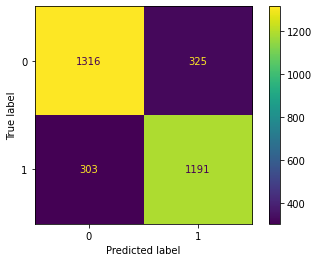

In [ ]:
#logistic regression
LR_matrix = LR_tune.fit(x_train_smote, y_train_smote)
y_pred = LR_tune.predict(x_test)
y_pred_train = LR_tune.predict(x_train_smote)
plot_confusion_matrix(LR_matrix, x_test, y_test)
plot_confusion_matrix


Fitting 4 folds for each of 36 candidates, totalling 144 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

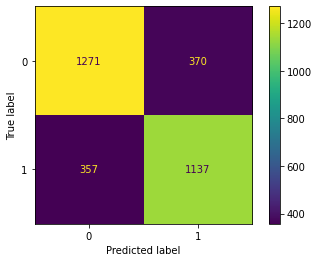

In [ ]:
#Decision Tree
DTC_matrix = DTC_tune.fit(x_train_smote, y_train_smote)
y_pred = DTC_tune.predict(x_test)
y_pred_train = DTC_tune.predict(x_train_smote)
plot_confusion_matrix(DTC_matrix, x_test, y_test)
plot_confusion_matrix

Fitting 4 folds for each of 36 candidates, totalling 144 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

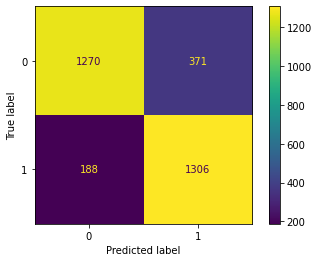

In [ ]:
#Random Forest Classifier
RF_matrix = RF_tune.fit(x_train_smote, y_train_smote)
y_pred = RF_tune.predict(x_test)
y_pred_train = RF_tune.predict(x_train_smote)
plot_confusion_matrix(RF_matrix, x_test, y_test)
plot_confusion_matrix


Fitting 4 folds for each of 32 candidates, totalling 128 fits


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

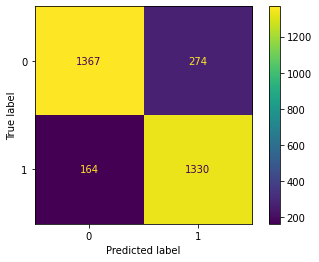

In [ ]:
#XGBoost
XGB_matrix = XGB_tune.fit(x_train_smote, y_train_smote)
y_pred = XGB_tune.predict(x_test)
y_pred_train = XGB_tune.predict(x_train_smote)
plot_confusion_matrix(XGB_matrix, x_test, y_test)
plot_confusion_matrix

**ROC-AUC Curve**

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best Threshold=0.504446, G-Mean=0.861


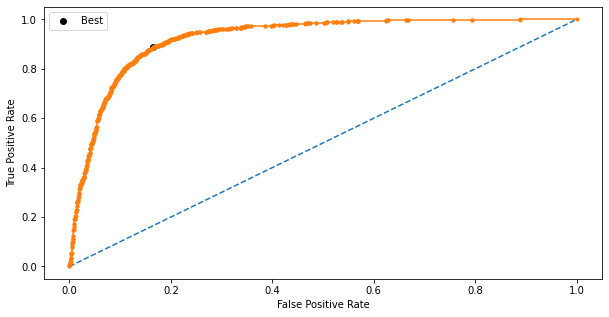

In [ ]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# fit a model
XGB_curve = XGB_tune.fit(x_train_smote, y_train_smote)
# predict probabilities
y_pred = XGB_curve.predict_proba(x_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.figure(figsize=(10,5))
pyplot.plot([0,1], [0,1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

The ROC AUC curve aims to measure classification performance by referring to the threshold between True Positive Rate (TPR) and False Positive Rate (FPR). The higher the TPR and the lower the FPR, the better the results with the visualization of the curve to the left. The visualization results above show that the best threshold value is 0.504446.

**Confusion Matrix (Best threshold)**

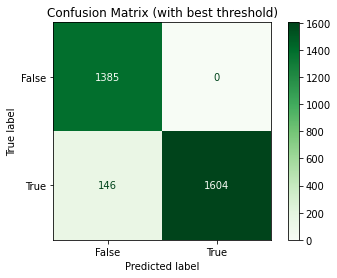

In [ ]:
clf = XGB_matrix  
# y_pred = clf.predict(X_test) # default threshold is 0.5 
y_pred = (clf.predict_proba(x_test)[:,1] >= 0.390464).astype(bool)
y_pred

fig = plot_confusion_matrix(clf, x_test, y_pred, cmap='Greens') 
plt.title('Confusion Matrix (with best threshold)') 
plt.show()

After getting the best threshold value from the ROC-AUC curve, then re-evaluating the model with the Confusion Matrix using a threshold number of 0.504446. The result is True Positive increased to 1604 and False Negative decreased to 0, as well as False Positive to 146.

**Prediction Result**

In [ ]:
LR_score = cross_validate(LR_tune, x_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
LR_train_score = LR_score['train_score'].mean()
LR_test_score = LR_score['test_score'].mean()
#SVC_score = cross_validate(SVC_tune, x_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
#SVC_train_score = SVC_score['train_score'].mean()
#SVC_test_score = SVC_score['test_score'].mean()
DTC_score = cross_validate(DTC_tune, x_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
DTC_train_score = DTC_score['train_score'].mean()
DTC_test_score = DTC_score['test_score'].mean()
RF_score = cross_validate(RF_tune, x_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
RF_train_score = RF_score['train_score'].mean()
RF_test_score = RF_score['test_score'].mean()
XGB_score = cross_validate(XGB_tune, x_train_smote, y_train_smote, cv=4, scoring='roc_auc', return_train_score=True)
XGB_train_score = XGB_score['train_score'].mean()
XGB_test_score = XGB_score['test_score'].mean()

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 32 candidates, totalling 128 fits
Fitting 4 folds for each of 32 candidates, totalling 128 fits
Fitting 4 folds for each of 32 candidates, totalling 128 fits
Fitting 4 folds for each of 32 candidates, totalling 128 fits


In [ ]:
results = pd.DataFrame([['Logistic Regression', LR_train_score, LR_test_score],
                        #['SVC', SVC_train_score, SVC_test_score], 
                        ['Decision Tree', DTC_train_score, DTC_test_score],
                        ['Random Forest', RF_train_score, RF_test_score],
                        ['XGBoost', XGB_train_score, XGB_test_score]],
                        columns = ['Models', 'Training Score', 'Testing Score'])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False)


,Models,Training Score,Testing Score
3,XGBoost,0.946555,0.918694
1,Decision Tree,0.942832,0.852084
2,Random Forest,0.903501,0.888546
0,Logistic Regression,0.866987,0.863848




After getting the results of the evaluation model through the Confusion Matrix, the best model for predicting customers who will churn is obtained by the XGBoost model and ROC-AUC metrics with a test score of 0.918694.

**Feature Importance**

SHapley Additive exPlanations (SHAP) SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction.


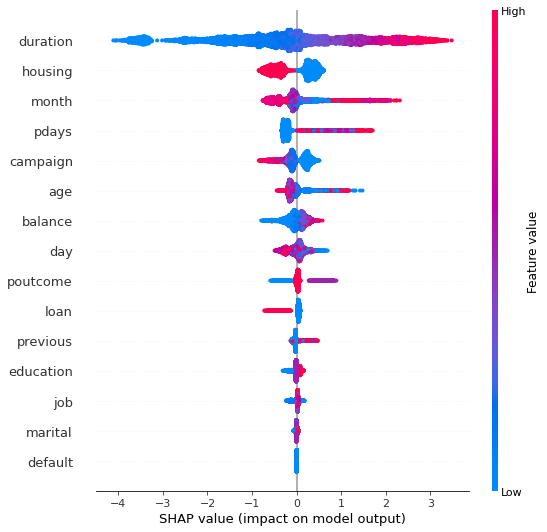

In [ ]:
model = XGBClassifier(min_child_weight = 4,
                      gamma= 4,
                      subsample= 1.0,
                      colsample_bytree= 0.8,
                      max_depth = 4)
model.fit(x_train_smote,y_train_smote)

shap_values = shap.TreeExplainer(model).shap_values(x_train_smote)
shap.summary_plot(shap_values,x_train_smote)


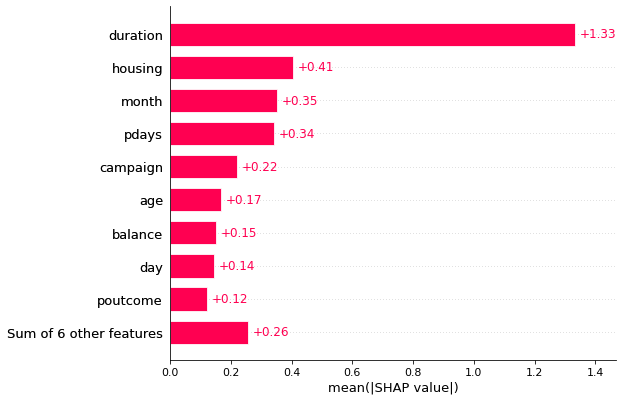

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(x_test)
shap.plots.bar(shap_values)


**Conclusion**

    
1. Our dataset consist of categorical and numerical features.
2. We have 16 independent features, out of these only half of them are important.
3. 'duration' is the most important feature while 'education' is the least important feature.
4. Month of May have seen the highest number of clients contacted but have the least success rate. Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality. Very few of the clients are contacted in the months of Mar,Sep and in Dec. **It is better to Contact the clients more in these months**.
5. When visualized age in groups, it is found that clients with age less than 30 and greater than 60 are less contacted through the campaign but have a higher success rate.
6. Different machine learning models are trained and tested on the dataset. XGBoost is an important model as it results in high AUC score.
7. If Multiple Campaigns and multiple contacts are performed for the clients, there is more chance for the client to not intrested to subscribe for the term deposit. Atmost 2 or 3 contacts can be preferred to perform for the clients.
8. Occupation of the clients in Retired, student and housemaid are subscribed more to the term deposits.Retired individuals tend to not spend larger of its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.
9. From the Analysis,Even the mid-age group clients subscribed more for the term deposits, there is a more domination of clients from this group who are not subscribed for the term deposits.old age group clients are subscribing the term deposits more and count of not subscribing to the deposits is less. It is well for the banks to focus on old age group clients to get more subscriptions for the term deposits.
10. From the Outcome of previous Campaign, if the outcome is Failure, then there is a 50% chance to the client will not subscribe to the term deposit. out of all failure outcomes 50.3 % of clients subscribes and 49.7 % are not subscribed to the term deposits
11. From the Outcome of previous Campaign, if the outcome is Success, then there is a high chance to the client will subscribe to the term deposit. out of all success outcomes 91.3% of clients subscribes and 8.7% are not subscribed to the term deposits
12. Clients who are not intrested to take housing loans may be intrested in subscribing for the term deposits.If the balance of client is above average blance then there is a chance to subscribe for the term deposit.



